In [1]:
import numpy as np
import llcf_test
from scipy.spatial import cKDTree
from matplotlib import pyplot as plt

## 1 Visualizing the effects of noise

## 1.1 Linear mapping

### 1.1.1 X sampled from normal

In [2]:
np.random.seed(0)

# Linear function without noise
n = 1000

X = np.random.normal(size=(n,1))
Y = 4*X + 3

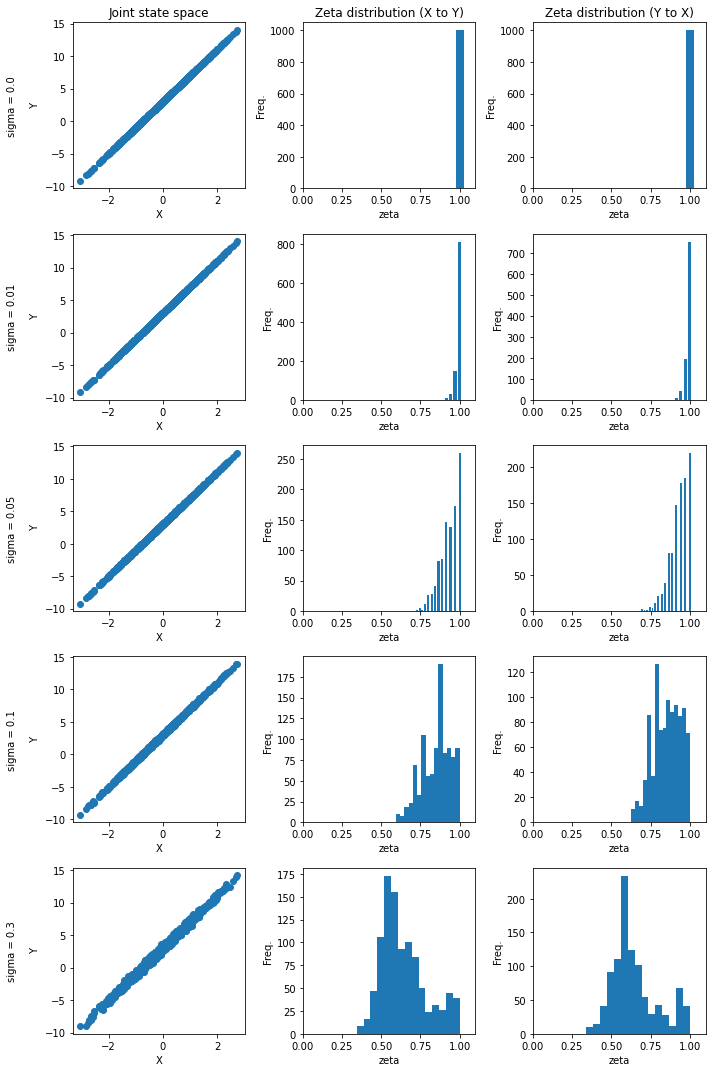

In [3]:
fig, axes = plt.subplots(5, 3, figsize=(10, 15))

axes[0][0].set_title("Joint state space")
axes[0][1].set_title("Zeta distribution (X to Y)")
axes[0][2].set_title("Zeta distribution (Y to X)")

sigmas = [0.0, 0.01, 0.05, 0.1, 0.3]
for i in range(5):
    Y_noisy = Y + sigmas[i]*np.random.normal(size=(n,1))
    
    axes[i][0].scatter(X, Y_noisy)
    axes[i][0].set_xlabel("X")
    axes[i][0].set_ylabel("sigma = " + str(sigmas[i]) + "\n\n Y")
    
    llcf_test.graphics.__add_zeta_histograms_to_axes(X, Y_noisy, axes[i][1], axes[i][2], xlabels=["zeta"]*2, ylabels=["Freq."]*2)

fig.set_tight_layout("pad")

### 1.1.2 X sampled from uniform

In [4]:
np.random.seed(0)

# Linear function without noise
n = 1000

X = np.random.uniform(-3.0, 3.0, size=(n,1))
Y = 4*X + 3

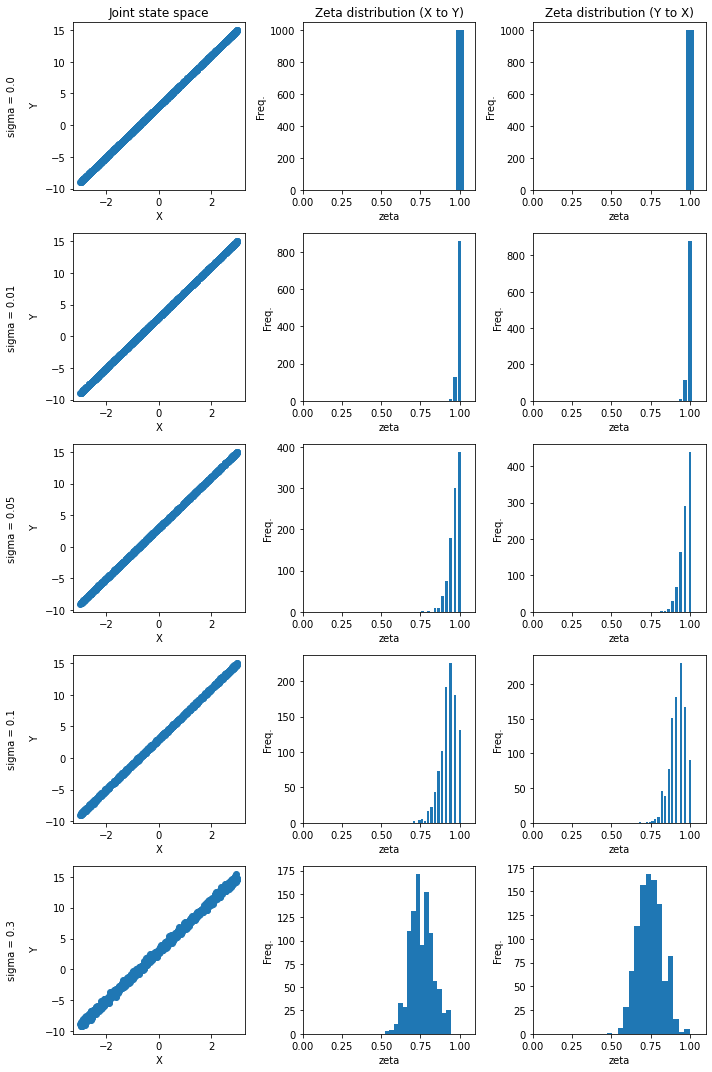

In [5]:
fig, axes = plt.subplots(5, 3, figsize=(10, 15))

axes[0][0].set_title("Joint state space")
axes[0][1].set_title("Zeta distribution (X to Y)")
axes[0][2].set_title("Zeta distribution (Y to X)")

sigmas = [0.0, 0.01, 0.05, 0.1, 0.3]
for i in range(5):
    Y_noisy = Y + sigmas[i]*np.random.normal(size=(n,1))
    
    axes[i][0].scatter(X, Y_noisy)
    axes[i][0].set_xlabel("X")
    axes[i][0].set_ylabel("sigma = " + str(sigmas[i]) + "\n\n Y")
    
    llcf_test.graphics.__add_zeta_histograms_to_axes(X, Y_noisy, axes[i][1], axes[i][2], xlabels=["zeta"]*2, ylabels=["Freq."]*2)

fig.set_tight_layout("pad")

## 1.2 Quadratic mapping

### 1.2.1 X sampled from Gaussian

In [6]:
np.random.seed(0)

# Quadratic function without noise
n = 1000

X = np.random.normal(size=(n,1))
Y = 4*X**2 + 3

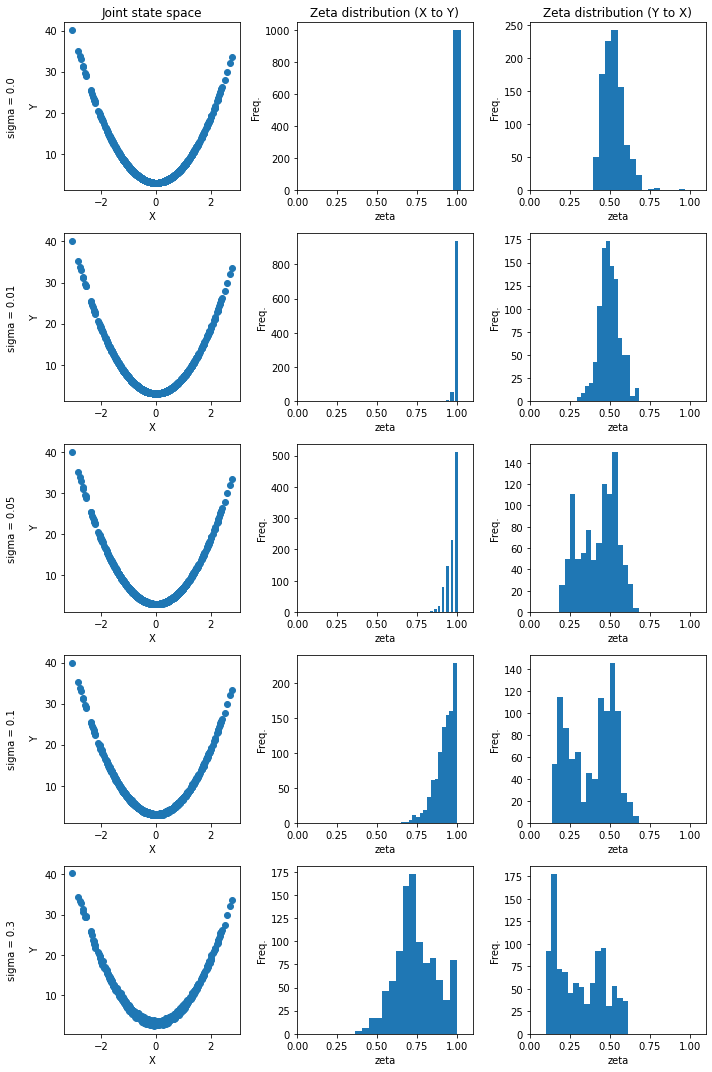

In [7]:
fig, axes = plt.subplots(5, 3, figsize=(10, 15))

axes[0][0].set_title("Joint state space")
axes[0][1].set_title("Zeta distribution (X to Y)")
axes[0][2].set_title("Zeta distribution (Y to X)")

sigmas = [0.0, 0.01, 0.05, 0.1, 0.3]
for i in range(5):
    Y_noisy = Y + sigmas[i]*np.random.normal(size=(n,1))
    
    axes[i][0].scatter(X, Y_noisy)
    axes[i][0].set_xlabel("X")
    axes[i][0].set_ylabel("sigma = " + str(sigmas[i]) + "\n\n Y")
    
    llcf_test.graphics.__add_zeta_histograms_to_axes(X, Y_noisy, axes[i][1], axes[i][2], xlabels=["zeta"]*2, ylabels=["Freq."]*2)

fig.set_tight_layout("pad")

### 1.2.2 X sampled from uniform

In [8]:
np.random.seed(0)

# Quadratic function without noise
n = 1000

X = np.random.uniform(-3.0, 3.0, size=(n,1))
Y = 4*X**2 + 3

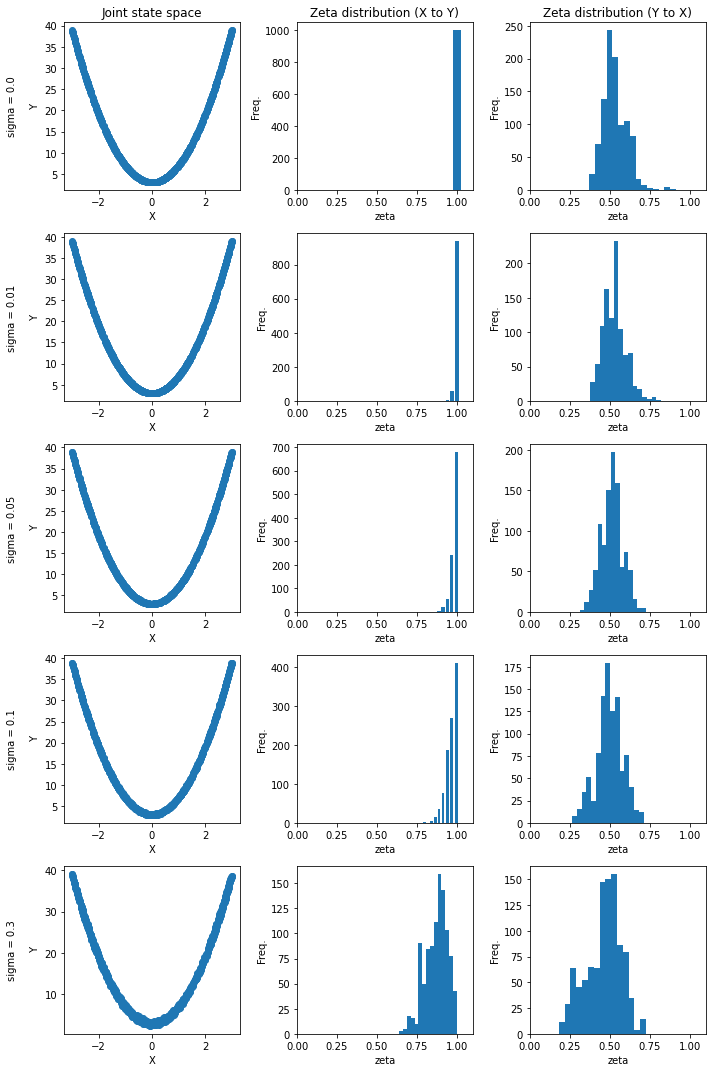

In [9]:
fig, axes = plt.subplots(5, 3, figsize=(10, 15))

axes[0][0].set_title("Joint state space")
axes[0][1].set_title("Zeta distribution (X to Y)")
axes[0][2].set_title("Zeta distribution (Y to X)")

sigmas = [0.0, 0.01, 0.05, 0.1, 0.3]
for i in range(5):
    Y_noisy = Y + sigmas[i]*np.random.normal(size=(n,1))
    
    axes[i][0].scatter(X, Y_noisy)
    axes[i][0].set_xlabel("X")
    axes[i][0].set_ylabel("sigma = " + str(sigmas[i]) + "\n\n Y")
    
    llcf_test.graphics.__add_zeta_histograms_to_axes(X, Y_noisy, axes[i][1], axes[i][2], xlabels=["zeta"]*2, ylabels=["Freq."]*2)

fig.set_tight_layout("pad")

# 2 Handling noise

In [10]:
# local averaging
def smooth(J, k):
    tree = cKDTree(J)
    _, nn_J = tree.query(J, k=k, n_jobs=-1)
    return np.apply_along_axis(lambda row: np.mean(J[row,:], axis=0), 1, nn_J[:,1:])

In [11]:
np.random.seed(0)

# Quadratic function without noise
n = 1000

X = np.random.uniform(-3.0, 3.0, size=(n,1))
Y = 4*X**2 + 3

In [12]:
Y_noisy = Y + 0.3*np.random.normal(size=(n,1))

In [13]:
X_prep, Y_prep = llcf_test.util.normalize(X, Y_noisy, "minmax")
J_prep = np.concatenate((X_prep, Y_prep), axis=1)

In [14]:
k = int(np.ceil(np.sqrt(X.shape[0])))
num_smoothing_iters = 4

gamma = 0.1

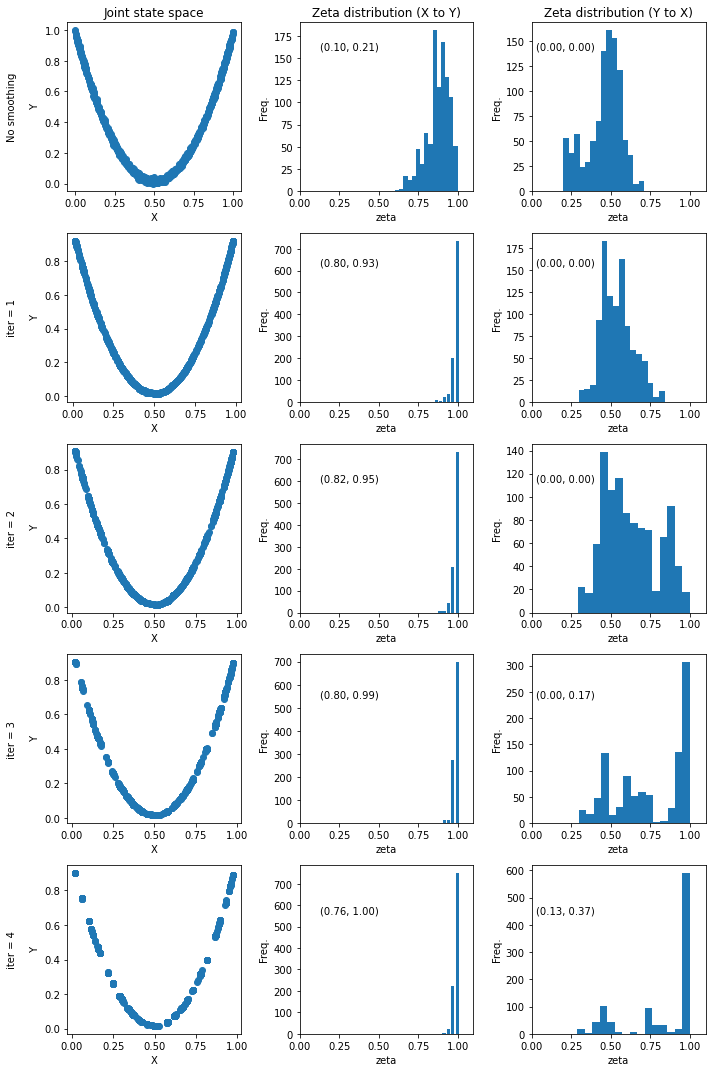

In [15]:
fig, axes = plt.subplots(num_smoothing_iters+1, 3, figsize=(10, 15))

axes[0][0].set_title("Joint state space")
axes[0][1].set_title("Zeta distribution (X to Y)")
axes[0][2].set_title("Zeta distribution (Y to X)")


J_prep_filtered = J_prep
for i in range(num_smoothing_iters+1):
    if i > 0:
        J_prep_filtered = smooth(J_prep_filtered, k)
    
    axes[i][0].scatter(J_prep_filtered[:,0], J_prep_filtered[:,1])
    axes[i][0].set_xlabel("X")
    
    if i == 0:
        axes[i][0].set_ylabel("No smoothing\n\n Y")
    else:
        axes[i][0].set_ylabel("iter = " + str(i) + "\n\n Y")
    
    llcf_test.graphics.__add_zeta_histograms_to_axes(J_prep_filtered[:,0], J_prep_filtered[:,1], axes[i][1], axes[i][2], xlabels=["zeta"]*2, ylabels=["Freq."]*2)
    
    ci = llcf_test.conf_ints(J_prep_filtered[:,0], J_prep_filtered[:,1], gamma=gamma)
    fig.text(0.45, 0.95-i*0.2, "(" + format(ci[0][0], '.2f') + ", " + format(ci[0][1], '.2f') + ")")
    fig.text(0.75, 0.95-i*0.2, "(" + format(ci[1][0], '.2f') + ", " + format(ci[1][1], '.2f') + ")")

fig.set_tight_layout("pad")